In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/")

Mounted at /content/drive


In [ ]:
df_reviews = pd.read_csv("reviews.csv")
df_product = pd.read_csv("product_data.csv")

In [ ]:
df_reviews.head()


,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [ ]:
df_product.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [ ]:
print(df_reviews.shape)
print("*"*40)
print(df_product.shape)

(67986, 8)
****************************************
(720, 10)


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   url            720 non-null    object 
 4   image          720 non-null    object 
 5   rating         720 non-null    float64
 6   reviewUrl      720 non-null    object 
 7   totalReviews   720 non-null    int64  
 8   price          720 non-null    float64
 9   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 56.4+ KB


In [ ]:
df_reviews = df_reviews.drop(["name", "date", "verified", "helpfulVotes"], axis=1)
df_reviews.head()

,asin,rating,title,body
0,B0000SX2UC,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...
1,B0000SX2UC,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...
2,B0000SX2UC,5,Love This Phone,"This is a great, reliable phone. I also purcha..."
3,B0000SX2UC,3,"Love the Phone, BUT...!","I love the phone and all, because I really did..."
4,B0000SX2UC,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...


In [ ]:
df_product = df_product.drop(["title", "url", "image", "rating", "reviewUrl", "totalReviews", "price", "originalPrice"], axis=1)
df_product.head()

,asin,brand
0,B0000SX2UC,NaN
1,B0009N5L7K,Motorola
2,B000SKTZ0S,Motorola
3,B001AO4OUC,Motorola
4,B001DCJAJG,Motorola


In [ ]:
print(df_reviews.isnull().sum())
print("*"*40)
print(df_product.isnull().sum())

asin       0
rating     0
title     14
body      21
dtype: int64
****************************************
asin     0
brand    4
dtype: int64


In [ ]:
df_reviews = df_reviews.dropna()
df_product = df_product.dropna()

print(df_reviews.isnull().sum())
print(df_reviews.shape)
print("*"*40)
print(df_product.isnull().sum())
print(df_product.shape)




asin      0
rating    0
title     0
body      0
dtype: int64
(67956, 4)
****************************************
asin     0
brand    0
dtype: int64
(716, 2)


In [ ]:
df = df_reviews.merge(df_product, on = "asin")
df.head()

,asin,rating,title,body,brand
0,B0009N5L7K,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola
1,B0009N5L7K,4,Exellent Service,I have been with nextel for nearly a year now ...,Motorola
2,B0009N5L7K,5,I love it,"I just got it and have to say its easy to use,...",Motorola
3,B0009N5L7K,1,Phones locked,1 star because the phones locked so I have to ...,Motorola
4,B0009N5L7K,5,Excellent product,The product has been very good. I had used thi...,Motorola


In [ ]:
df[['rating']].describe()

,rating
count,67756.000000
mean,3.807840
std,1.583129
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


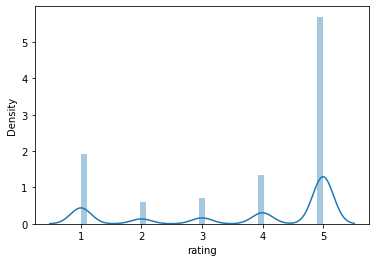

In [ ]:
sns.distplot(df["rating"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


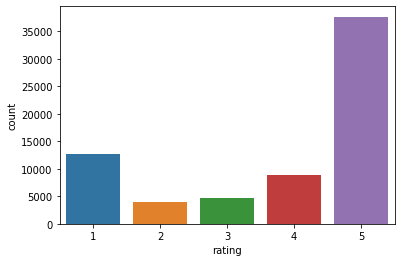

In [ ]:
sns.countplot(df['rating'])

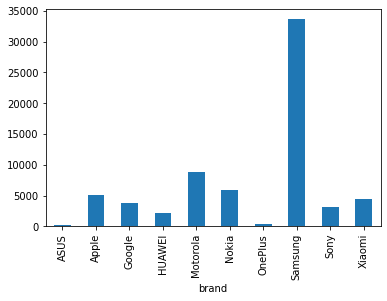

In [ ]:
df.groupby('brand').size().plot.bar()

In [ ]:
sentiment = []
for row in df['rating']:
  if row < 3 : sentiment.append('-1')
  elif row == 3 : sentiment.append('0')
  elif row >3 : sentiment.append('1')

df['sentiment'] = sentiment
df.head()

,asin,rating,title,body,brand,sentiment
0,B0009N5L7K,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,-1
1,B0009N5L7K,4,Exellent Service,I have been with nextel for nearly a year now ...,Motorola,1
2,B0009N5L7K,5,I love it,"I just got it and have to say its easy to use,...",Motorola,1
3,B0009N5L7K,1,Phones locked,1 star because the phones locked so I have to ...,Motorola,-1
4,B0009N5L7K,5,Excellent product,The product has been very good. I had used thi...,Motorola,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67756 entries, 0 to 67755
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   asin       67756 non-null  object
 1   rating     67756 non-null  int64 
 2   title      67756 non-null  object
 3   body       67756 non-null  object
 4   brand      67756 non-null  object
 5   sentiment  67756 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.1+ MB


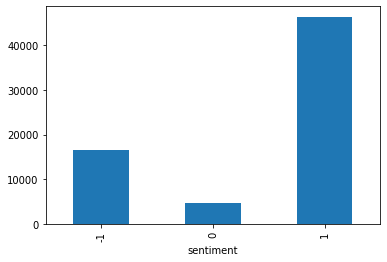

In [ ]:
df.groupby('sentiment').size().plot.bar()

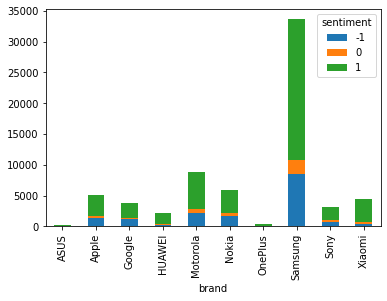

In [ ]:
ct=pd.crosstab(df.brand, df.sentiment)

ct.plot.bar(stacked=True)

plt.show()

In [ ]:
print(ct)

sentiment    -1     0      1
brand                       
ASUS         64    25    162
Apple      1434   322   3388
Google     1168   267   2351
HUAWEI      309   124   1792
Motorola   2104   653   6122
Nokia      1710   540   3664
OnePlus      52    13    282
Samsung    8531  2292  22781
Sony        770   280   2145
Xiaomi      460   222   3729


In [ ]:
df['body'] = df['body'].str.lower()
df['title'] =df['title'].str.lower()

In [ ]:
df["body"] = df['body'].str.replace('[^\w\s]','')
df["title"] = df['title'].str.replace('[^\w\s]','')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop = stopwords.words('english')

df['body_stops'] = df['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['title_stops'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df = df.drop(['body', 'title'], axis = 1)
df.head()

,asin,rating,brand,sentiment,body_stops,title_stops
0,B0009N5L7K,1,Motorola,-1,dont buy service,stupid phone
1,B0009N5L7K,4,Motorola,1,nextel nearly year started time last year moto...,exellent service
2,B0009N5L7K,5,Motorola,1,got say easy use hear person talking fine prob...,love
3,B0009N5L7K,1,Motorola,-1,1 star phones locked pay additional fees unlock,phones locked
4,B0009N5L7K,5,Motorola,1,product good used cell phone one projects work...,excellent product


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(df['body_stops'])

In [ ]:
y = df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Model
rf = RandomForestClassifier(max_depth=8)
rf.fit(X_train,Y_train)
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

In [ ]:
print("Train score",rf.score(X_train, Y_train))
print("Test score",rf.score(X_test, Y_test))

Train score 0.6846542690576342
Test score 0.686909681227863
